
Descriptive Statistics for Training Data:
        tahun_kelahiran pendidikan status_pernikahan    pendapatan  \
count       3817.000000       3628              3605  3.627000e+03   
unique              NaN          6                 6           NaN   
top                 NaN    Sarjana   Rencana Menikah           NaN   
freq                NaN       1841              1271           NaN   
mean        1967.823946        NaN               NaN  1.144832e+08   
std           11.768131        NaN               NaN  4.346042e+07   
min         1899.000000        NaN               NaN  5.073000e+06   
25%         1959.000000        NaN               NaN  8.112512e+07   
50%         1968.000000        NaN               NaN  1.156214e+08   
75%         1976.000000        NaN               NaN  1.504960e+08   
max         2000.000000        NaN               NaN  3.328840e+08   

        jumlah_anak_balita  jumlah_anak_remaja  terakhir_belanja  \
count          3627.000000         3613.000000  

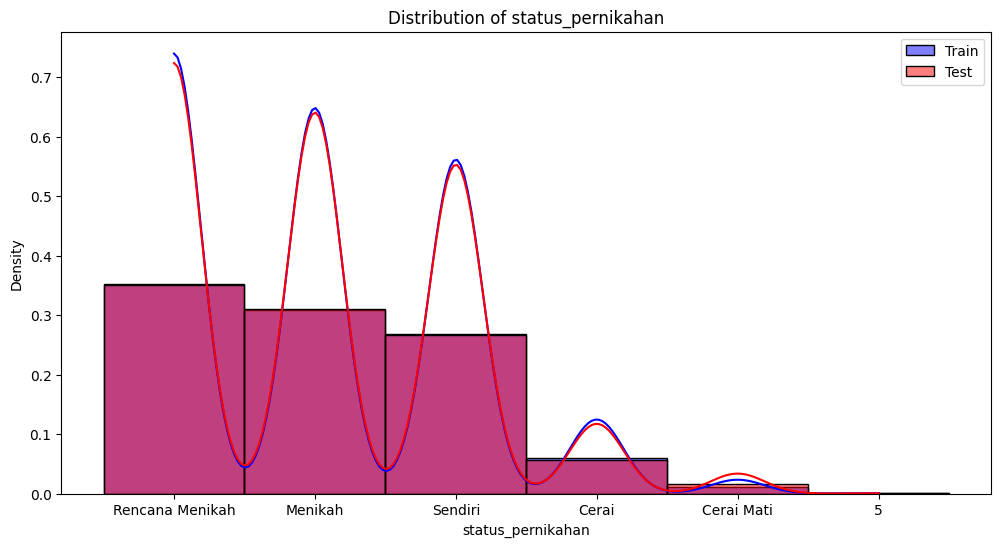


Missing Values:
Train Data:
 tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64
Test Data:
 ID                            0
tahun_kelahiran               0
pendidikan                  204
status_pernikahan           182
pendapatan                  203
jumlah_anak_balita          209
jumlah_anak_remaja          210
terakhir_belanja            201
belanja_buah                186
belanja_daging              195
belanja_ikan                196
belanja_kue                 187
pembelian_diskon            179
pembelian_web    

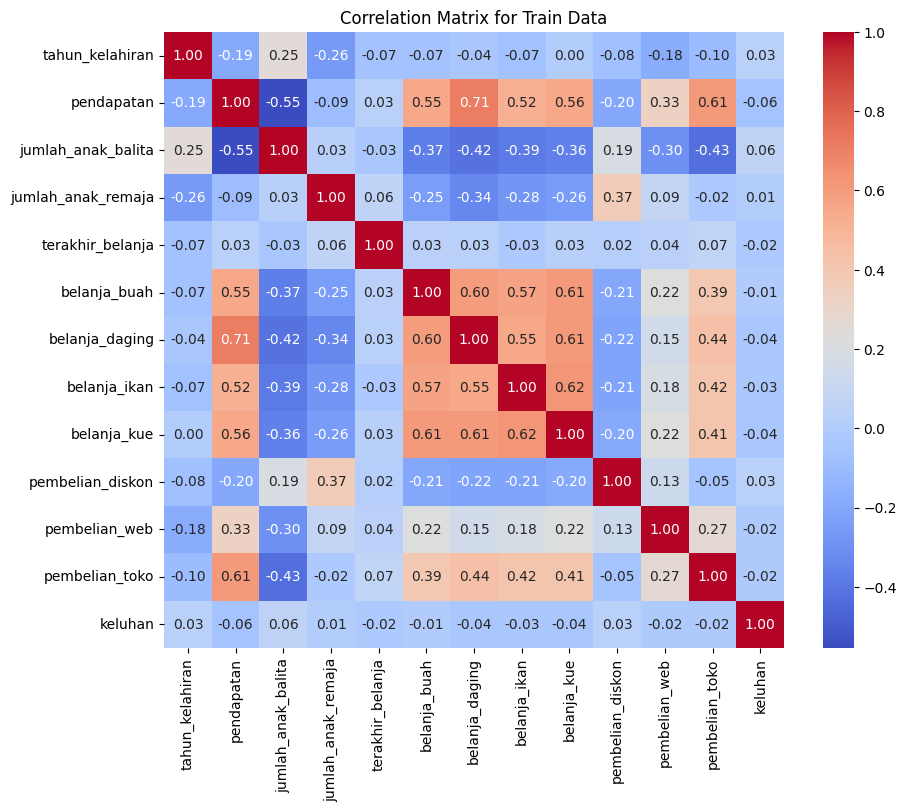

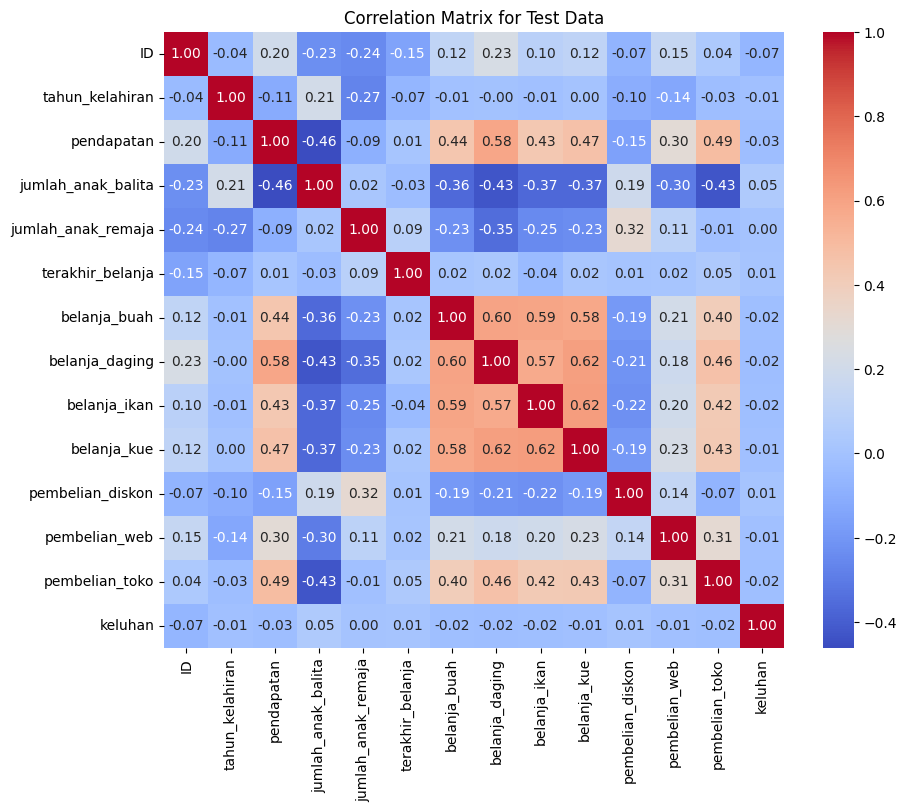

tahun_kelahiran: t-statistic = 0.126, p-value = 0.900
pendapatan: t-statistic = -1.653, p-value = 0.098
jumlah_anak_balita: t-statistic = 0.923, p-value = 0.356
jumlah_anak_remaja: t-statistic = -0.137, p-value = 0.891
terakhir_belanja: t-statistic = 0.079, p-value = 0.937
belanja_buah: t-statistic = -0.809, p-value = 0.419
belanja_daging: t-statistic = -1.187, p-value = 0.235
belanja_ikan: t-statistic = -1.633, p-value = 0.103
belanja_kue: t-statistic = -0.228, p-value = 0.820
pembelian_diskon: t-statistic = 0.484, p-value = 0.629
pembelian_web: t-statistic = -0.411, p-value = 0.681
pembelian_toko: t-statistic = -0.890, p-value = 0.373
keluhan: t-statistic = 1.518, p-value = 0.129

Interpretation of p-values:
tahun_kelahiran tidak menunjukkan perbedaan signifikan antara data train dan test (p-value = 0.900)
pendapatan tidak menunjukkan perbedaan signifikan antara data train dan test (p-value = 0.098)
jumlah_anak_balita tidak menunjukkan perbedaan signifikan antara data train dan test 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Membaca data train dan data test
data_train = pd.read_csv('train_features.csv')  # Ganti dengan nama file data train Anda
data_test = pd.read_csv('test_features.csv')

# Analisis deskriptif
def descriptive_stats(data, name):
    print(f"\nDescriptive Statistics for {name}:")
    print(data.describe(include='all'))

descriptive_stats(data_train, 'Train Data')
descriptive_stats(data_test, 'Test Data')

# Visualisasi distribusi
def plot_distribution(data_train, data_test, column):
    plt.figure(figsize=(12, 6))
    sns.histplot(data_train['status_pernikahan'], color='blue', label='Train', kde=True, stat='density', bins=30)
    sns.histplot(data_test['status_pernikahan'], color='red', label='Test', kde=True, stat='density', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


column_name = 'status_pernikahan'
plot_distribution(data_train, data_test, 'status_pernikahan')


print("\nMissing Values:")
print("Train Data:\n", data_train.isnull().sum())
print("Test Data:\n", data_test.isnull().sum())


def correlation_analysis(data, name):
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 8))
    corr = numeric_data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()


correlation_analysis(data_train, 'Train Data')
correlation_analysis(data_test, 'Test Data')

# Pengujian statistik (t-test)
for column in data_train.select_dtypes(include=[np.number]).columns:
    t_stat, p_value = stats.ttest_ind(data_train[column].dropna(), data_test[column].dropna(), equal_var=False)
    print(f"{column}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# Interpretasi hasil p-value
alpha = 0.05
print("\nInterpretation of p-values:")
for column in data_train.select_dtypes(include=[np.number]).columns:
    t_stat, p_value = stats.ttest_ind(data_train[column].dropna(), data_test[column].dropna(), equal_var=False)
    if p_value < alpha:
        print(f"{column} menunjukkan perbedaan signifikan antara data train dan test (p-value = {p_value:.3f})")
    else:
        print(f"{column} tidak menunjukkan perbedaan signifikan antara data train dan test (p-value = {p_value:.3f})")
